In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv("./DataSet/Clean_FattyLiver_Data.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,5,14423,6,39,0,63.9,155.0,26.615590,7144.0,1581,0


In [35]:
print(df.isnull().sum())
print(df.shape)

Unnamed: 0.1    0
Unnamed: 0      0
id              0
age             0
male            0
weight          0
height          0
bmi             0
case.id         0
futime          0
status          0
dtype: int64
(12031, 11)


In [36]:
corr_matrix = df.corr()
corr_matrix['status']*100

Unnamed: 0.1     -0.015095
Unnamed: 0      -12.238358
id               -0.015128
age              33.234667
male              3.668275
weight           -3.920089
height           -6.561682
bmi              -0.810491
case.id          -1.641007
futime           -9.488221
status          100.000000
Name: status, dtype: float64

<Axes: >

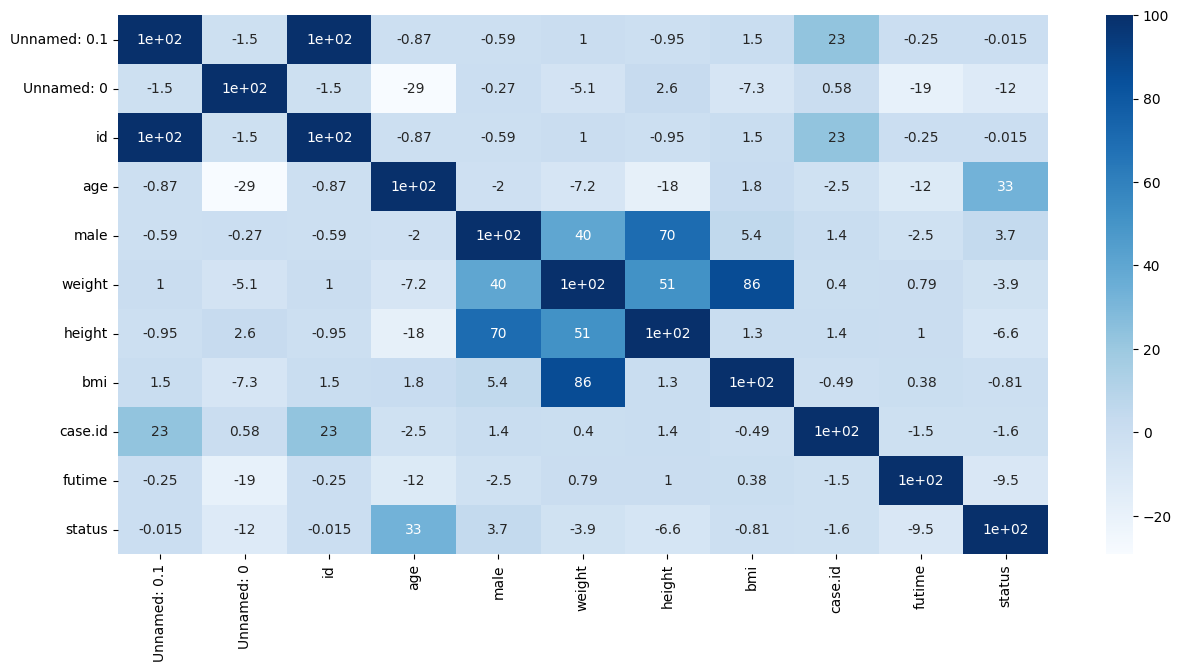

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix*100, annot=True, cmap='Blues')

In [8]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'age', 'male', 'weight', 'height',
       'bmi', 'case.id', 'futime', 'status'],
      dtype='object')

In [59]:
X = df.drop(['Unnamed: 0.1','Unnamed: 0', 'id', 'status','bmi','case.id'], axis='columns')
y = df.status
print(X.shape, y.shape)

(12031, 5) (12031,)


In [60]:
### count of male and frmale
### 962 -> 1 || 11069 -> 0
len(y[y==1])
### 962+11069 === 12031 satisfied


962

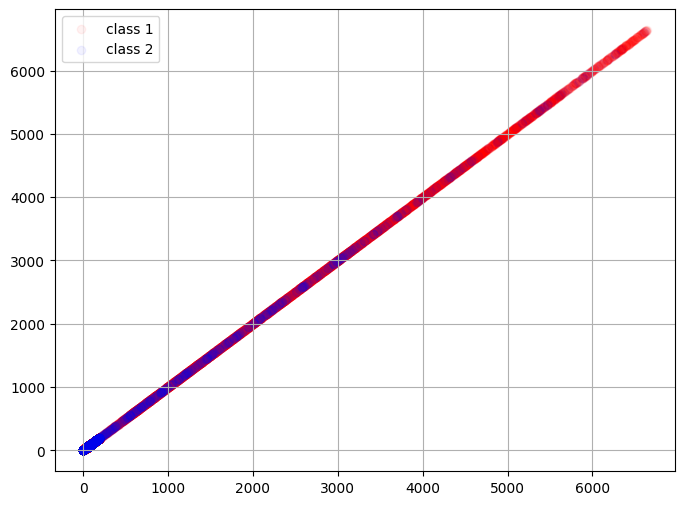

In [61]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

### Let's apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)

### Let's plot the data
plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train == 0], X_train[y_train == 0], color='red', label='class 1', alpha=0.05)
plt.scatter(X_train[y_train == 1], X_train[y_train == 1], color='blue', label='class 2',alpha=0.05)
plt.legend()
plt.grid(True)

In [62]:
X_train.shape

(9624, 5)

In [63]:
X_smote.shape

(17700, 5)

In [64]:
### Before smote
pd.Series(y_train).value_counts()

status
0    8850
1     774
Name: count, dtype: int64

In [65]:
### After smote
pd.Series(y_smote).value_counts()


status
0    8850
1    8850
Name: count, dtype: int64

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_smote,y_smote)

print("Train Accuracy -> ",lr.score(X_train,y_train)*100)
print("Test Accuracy -> ",lr.score(X_test,y_test)*100)

Train Accuracy ->  74.34538653366583
Test Accuracy ->  73.99252181138345


In [67]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_smote,y_smote)

print("Train Accuracy -> ",svm.score(X_smote,y_smote)*100)
print("Test Accuracy -> ",svm.score(X_test,y_test)*100)

Train Accuracy ->  69.59887005649718
Test Accuracy ->  72.53842958039053


In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_smote,y_smote)

print("Train Accuracy -> ",rf.score(X_smote,y_smote)*100)
print("Test Accuracy -> ",rf.score(X_test,y_test)*100)

Train Accuracy ->  100.0
Test Accuracy ->  85.08516825924387


In [69]:
len(X_smote.columns)
X_train.shape

(9624, 5)

In [70]:
pd.Series(y_smote).value_counts()

status
0    8850
1    8850
Name: count, dtype: int64

In [71]:
import tensorflow as tf
from tensorflow import keras


mdl = keras.Sequential([
    keras.layers.Dense(3, input_shape = (5,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'), 
])

mdl.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
)

mdl.fit(X_smote, y_smote, epochs=15)

Epoch 1/15
554/554 [==============================] - 2s 2ms/step - loss: 130.7252 - accuracy: 0.4988
Epoch 2/15
554/554 [==============================] - 1s 2ms/step - loss: 0.7029 - accuracy: 0.5000
Epoch 3/15
554/554 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 4/15
554/554 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 5/15
554/554 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 6/15
554/554 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 7/15
554/554 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4982
Epoch 8/15
554/554 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4915
Epoch 9/15
554/554 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4975
Epoch 10/15
554/554 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.49